## T-test 

In [132]:
from chart_studio import plotly as py 
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, ttest_ind, t

import numpy as np
import pandas as pd
from scipy import stats

In [140]:
data1 = np.random.normal(0, 1, size=1000)
data2 = np.random.normal(2, 1, size=1000)

In [141]:
x = np.linspace(-4, 4, 160)
y1 = stats.norm.pdf(x)
y2 = stats.norm.pdf(x, loc=2)

trace1 = go.Scatter(
    x = x,
    y = y1,
    mode = 'lines+markers',
    name='Mean of 0'
)

trace2 = go.Scatter(
    x = x,
    y = y2,
    mode = 'lines+markers',
    name='Mean of 2'
)

fig = go.Figure()

fig.add_trace(trace1)
fig.add_trace(trace2)

fig.show()

In [142]:
from plotly.figure_factory import create_table

In [143]:
true_mu = 0

onesample_results = stats.ttest_1samp(data1, true_mu)

matrix_onesample = [
    ['', 'Test Statistic', 'p-value'],
    ['Sample Data', onesample_results[0], onesample_results[1]]
]

onesample_table = create_table(matrix_onesample, index=True)


In [144]:
onesample_table

## Двусторонний

In [145]:
twosample_results = stats.ttest_ind(data1, data2)

matrix_twosample = [
    ['', 'Test Statistic', 'p-value'],
    ['Sample Data', twosample_results[0], twosample_results[1]]
]

twosample_table = create_table(matrix_twosample, index=True)


In [146]:
twosample_table

## Mann Whitney

In [147]:
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, ttest_ind, t

In [148]:
data1 = 5 * np.random.randn(1000) + 50 # среднее 50, дисперсия 25
data2 = 5 * np.random.randn(1000) + 51 # среднее 51, дисперсия 25

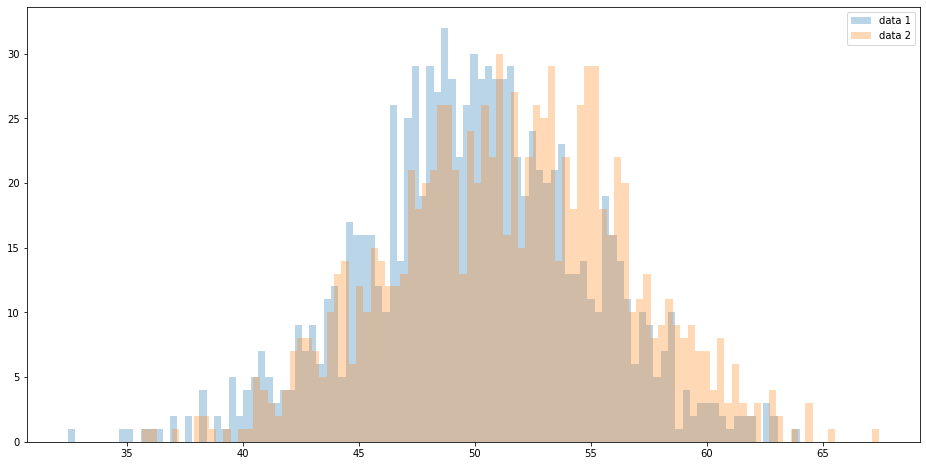

In [149]:
plt.figure(figsize=(16, 8))
plt.hist(data1, bins=100, alpha=0.3, label='data 1')
plt.hist(data2, bins=100, alpha=0.3, label= 'data 2')
plt.legend()
plt.show()

In [150]:
stat, p = mannwhitneyu(data1, data2)
print(f'Statistics={stat}, p={p}')
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=418099.0, p=2.2621297272556556e-10
Different distribution (reject H0)


In [152]:
num_tests = 10000

In [153]:
counter_acc = 0
stats_diff = []
for i in tqdm(range(num_tests)):
    data1 = 5 * np.random.randn(1000) + 50
    data2 = 5 * np.random.randn(1000) + 51
    stat, p = mannwhitneyu(data1, data2)
    counter_acc += p > alpha
    stats_diff.append(stat)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [154]:
# первое число - сколько раз мы приняли нулевую гипотезу при условии, что верна альтернативная
# это ошибка 2 рода

counter_acc, num_tests - counter_acc

(80, 9920)

In [155]:
counter_acc = 0
stats_same = []
for i in tqdm(range(num_tests)):
    data1 = 5 * np.random.randn(1000) + 50
    data2 = 5 * np.random.randn(1000) + 50
    stat, p = mannwhitneyu(data1, data2)
    counter_acc += p > alpha
    stats_same.append(stat)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [158]:
# второе число - вероятность ошибки первого рода, то есть мы приняли альтернативную гипотезу, при условии что различий нет
# 
counter_acc, num_tests - counter_acc


(9508, 492)

#### Суть теста: найти такую статистику, в которой малейшее изменения в параметре приводят к сильным изменениям в статистике

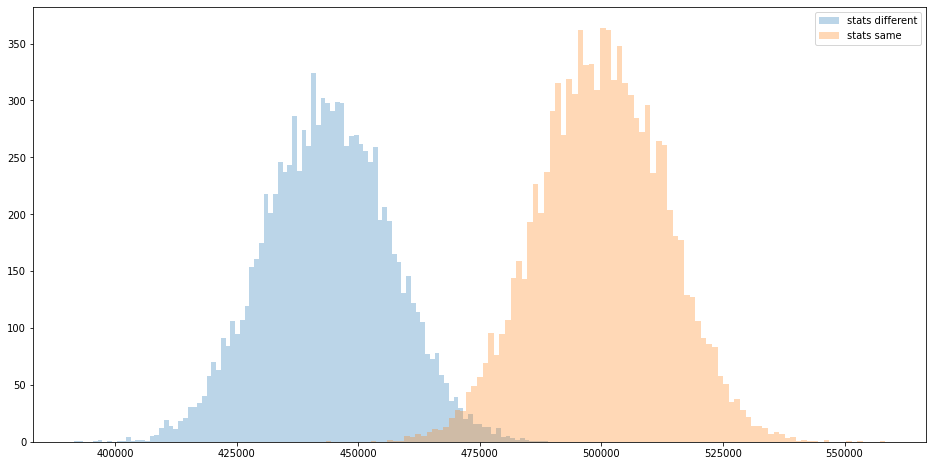

In [159]:
plt.figure(figsize=(16, 8))
plt.hist(stats_diff, bins=100, alpha=0.3,label='stats different')
plt.hist(stats_same, bins=100, alpha=0.3, label='stats same')
plt.legend()
plt.show()

# Sequence probability ratio test

$$f_{\eta}(t) = \frac{b}{\eta}\left(\frac{t}{\eta}\right)^{b - 1}\exp\left(-\left(\frac{t}{\eta}\right)^{b}\right)$$

In [160]:
eta = 1.5
b = 1

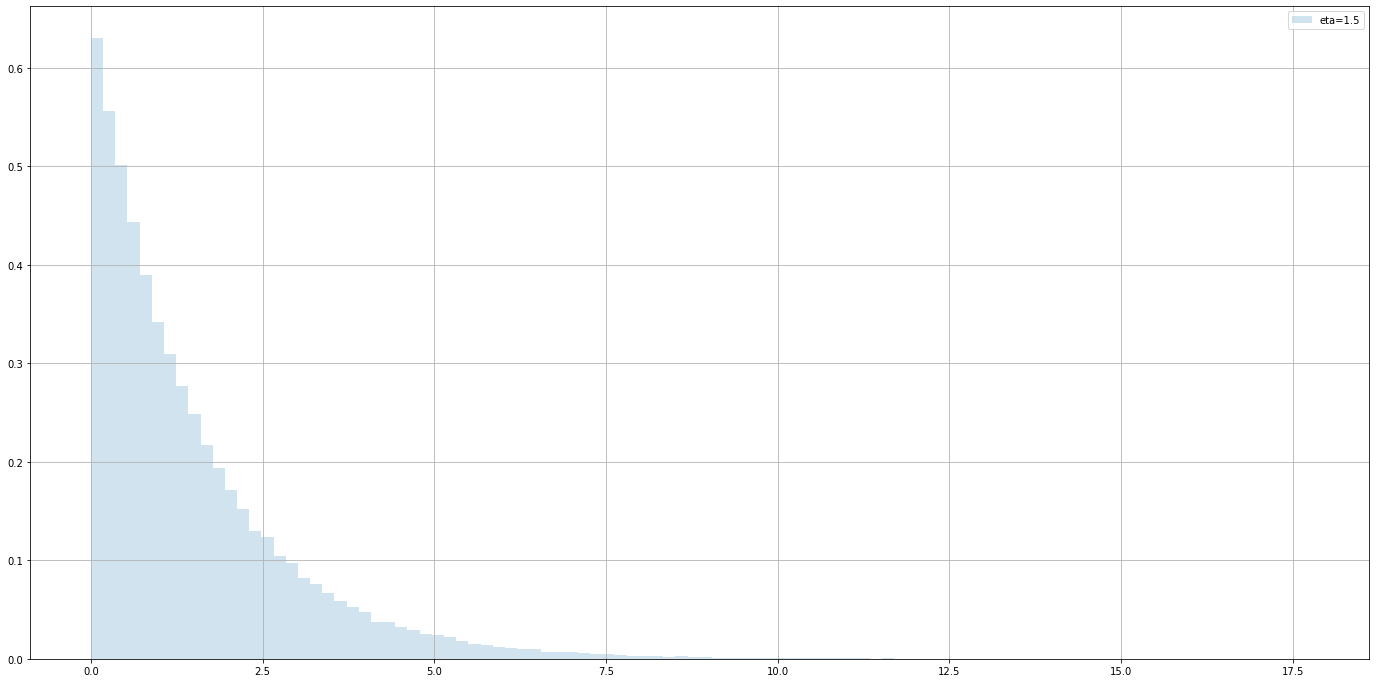

In [161]:
plt.figure(figsize=(24, 12))
plt.hist(eta * np.random.weibull(b, 100000), bins=100, density=True, alpha=0.2, label=f'eta={eta}')
plt.grid()
plt.legend()
plt.show()

Поменяем b

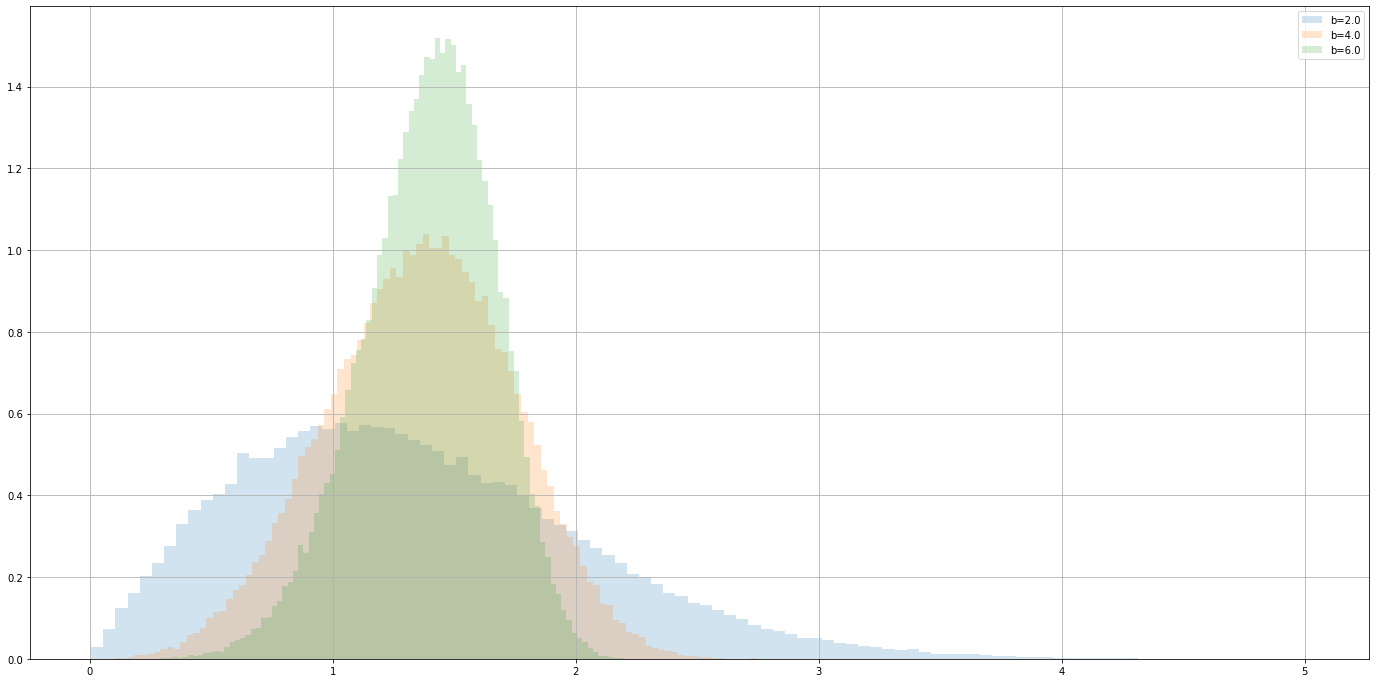

In [162]:
plt.figure(figsize=(24, 12))
for b in np.linspace(2, 6, 3):
    plt.hist(eta * np.random.weibull(b, 100000), bins=100, density=True, alpha=0.2, label=f'b={b}')
plt.grid()
plt.legend()
plt.show()

Поменяем eta

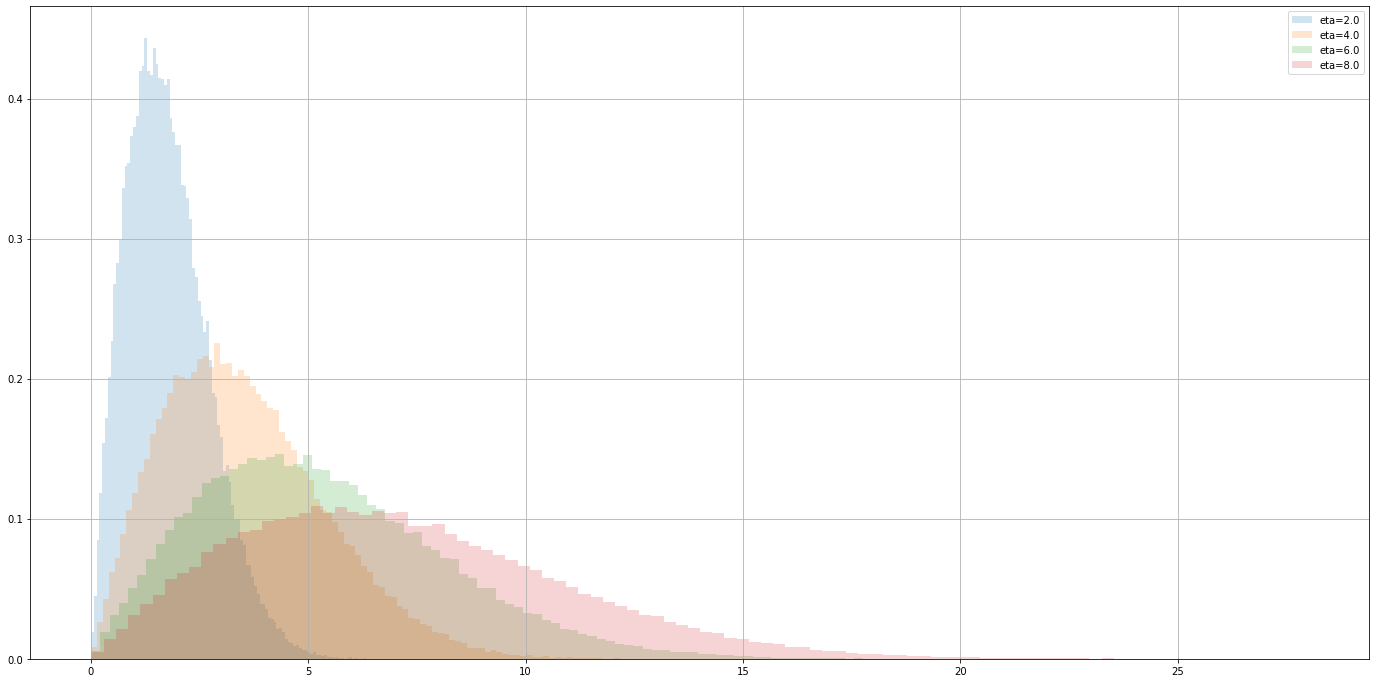

In [163]:
b = 2
plt.figure(figsize=(24, 12))
for eta in np.linspace(2, 8, 4):
    plt.hist(eta * np.random.weibull(b, 100000), bins=100, density=True, alpha=0.2, label=f'eta={eta}')
plt.grid()
plt.legend()
plt.show()

### Проверим тест

In [198]:
eta1 = 2
eta2 = 2.5
eta_real = 2.1
b = 2.25

alpha1 = 0.001
alpha2 = 0.0001
n = 10000

In [199]:
data1 = np.random.weibull(b, size=n) * eta_real
counter_acc = 0
L = []
U = []
V = [0]
for i in range(n):
    V.append(V[-1] + data1[i]**b)
    L.append((eta1 * eta2)**b / (eta2**b - eta1**b) * (np.log(alpha2 / (1 - alpha1)) + (i + 1) * b * np.log(eta2 / eta1)))
    U.append((eta1 * eta2)**b / (eta2**b - eta1**b) * (np.log((1 - alpha2) / alpha1) + (i + 1) * b * np.log(eta2 / eta1)))
    if V[-1] < L[-1]:
        counter_acc += 1
        break
    if V[-1] > U[-1]:
        break
V = V[1:]

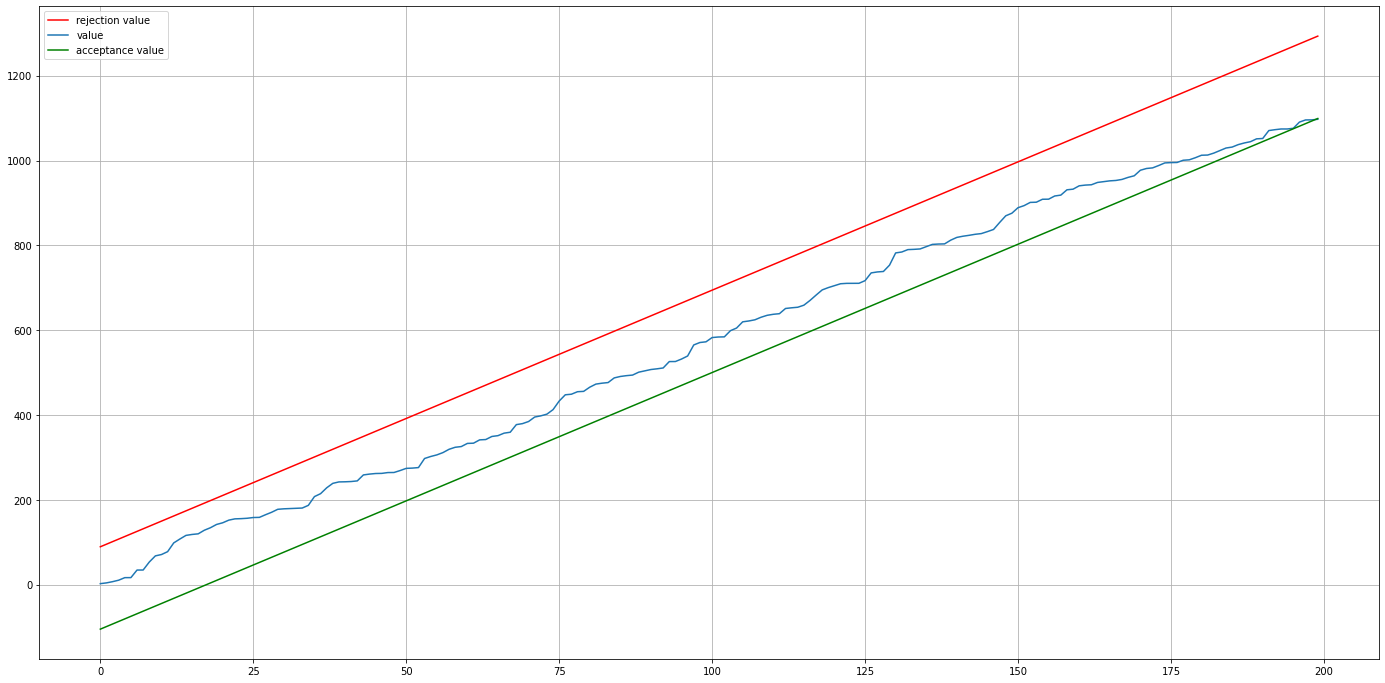

In [200]:
plt.figure(figsize=(24, 12))
plt.plot(U, label='rejection value', c='red')
plt.plot(V, label='value')
plt.plot(L, label='acceptance value', c='green')
plt.grid()
plt.legend()
plt.show()

#### Eta 1 верна

In [182]:
counter_acc = 0
for j in tqdm(range(10000)):
    data1 = np.random.weibull(b, size=n) * eta1
    L = []
    U = []
    V = [0]
    for i in range(n):
        V.append(V[-1] + data1[i]**b)
        L.append((eta1 * eta2)**b / (eta2**b - eta1**b) * (np.log(alpha2 / (1 - alpha1)) + (i + 1) * b * np.log(eta2 / eta1)))
        U.append((eta1 * eta2)**b / (eta2**b - eta1**b) * (np.log((1 - alpha2) / alpha1) + (i + 1) * b * np.log(eta2 / eta1)))
        if V[-1] < L[-1]:
            counter_acc += 1
            break
        if V[-1] > U[-1]:
            break
    V = V[1:]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [183]:
counter_acc, 10000 - counter_acc

(9692, 308)

####  300 раз была отвергнута H0 при условии, что она верна (О1Р). Наша alpha = 0.05, то есть не больше 500 раз отвергаем

#### Eta 2 верна

In [184]:
counter_acc = 0
for j in tqdm(range(10000)):
    data1 = np.random.weibull(b, size=n) * eta2
    L = []
    U = []
    V = [0]
    for i in range(n):
        V.append(V[-1] + data1[i]**b)
        L.append((eta1 * eta2)**b / (eta2**b - eta1**b) * (np.log(alpha2 / (1 - alpha1)) + (i + 1) * b * np.log(eta2 / eta1)))
        U.append((eta1 * eta2)**b / (eta2**b - eta1**b) * (np.log((1 - alpha2) / alpha1) + (i + 1) * b * np.log(eta2 / eta1)))
        if V[-1] < L[-1]:
            counter_acc += 1
            break
        if V[-1] > U[-1]:
            break
    V = V[1:]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [185]:
counter_acc, 10000 - counter_acc

(882, 9118)